Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Libraries

In [2]:
dim_date = pd.read_csv('dim_date.csv')
dim_hotels = pd.read_csv('dim_hotels.csv')
dim_rooms = pd.read_csv('dim_rooms.csv')
fact_aggregated_bookings = pd.read_csv('fact_aggregated_bookings.csv')
fact_bookings = pd.read_csv('fact_bookings.csv')

Showcasing the dataframes

In [3]:
dim_date

,date,mmm yy,week no,day_type
0,01-05-2022,May-22,W 19,weekend
1,02-05-2022,May-22,W 19,weekeday
2,03-05-2022,May-22,W 19,weekeday
3,04-05-2022,May-22,W 19,weekeday
4,05-05-2022,May-22,W 19,weekeday
...,...,...,...,...
87,27-07-2022,Jul-22,W 31,weekeday
88,28-07-2022,Jul-22,W 31,weekeday
89,29-07-2022,Jul-22,W 31,weekeday
90,30-07-2022,Jul-22,W 31,weekend


In [4]:
dim_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


Renaming specific fileds in the dataframes to enable merging

In [5]:
dim_rooms.rename(columns={'room_id':'room_category'},inplace=True)

In [6]:
fact_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-2022,31-07-2022,02-08-2022,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-2022,31-07-2022,01-08-2022,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [7]:
dim_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [8]:
fact_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-05-2022,RT1,25,30
1,19562,01-05-2022,RT1,28,30
2,19563,01-05-2022,RT1,23,30
3,17558,01-05-2022,RT1,13,19
4,16558,01-05-2022,RT1,18,19
...,...,...,...,...,...
9195,16563,31-07-2022,RT4,13,18
9196,16559,31-07-2022,RT4,13,18
9197,17558,31-07-2022,RT4,3,6
9198,19563,31-07-2022,RT4,3,6


In [9]:
dim_date.rename(columns={'date':'check_in_date'},inplace=True)

In [10]:
dim_date

,check_in_date,mmm yy,week no,day_type
0,01-05-2022,May-22,W 19,weekend
1,02-05-2022,May-22,W 19,weekeday
2,03-05-2022,May-22,W 19,weekeday
3,04-05-2022,May-22,W 19,weekeday
4,05-05-2022,May-22,W 19,weekeday
...,...,...,...,...
87,27-07-2022,Jul-22,W 31,weekeday
88,28-07-2022,Jul-22,W 31,weekeday
89,29-07-2022,Jul-22,W 31,weekeday
90,30-07-2022,Jul-22,W 31,weekend


Merging the dataframes

In [11]:
merged_data = pd.merge(fact_bookings, dim_hotels, on='property_id', how='left')


In [12]:
merged_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,4,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,30-07-2022,31-07-2022,02-08-2022,1,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,29-07-2022,31-07-2022,01-08-2022,2,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [13]:
merged_data = pd.merge(merged_data, dim_date, on='check_in_date', how='left')

In [14]:
merged_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,mmm yy,week no,day_type
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,Jul-22,W 32,weekend
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,4,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai,Jul-22,W 32,weekend
134587,Jul312217564RT48,17564,30-07-2022,31-07-2022,02-08-2022,1,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai,Jul-22,W 32,weekend
134588,Jul312217564RT49,17564,29-07-2022,31-07-2022,01-08-2022,2,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,Jul-22,W 32,weekend


Filtering the data to count only those bookings where people have both checked in and out of their booked hotel rooms

In [15]:
filtered_data = merged_data[(merged_data['booking_status'] == 'Checked Out')]

In [16]:
filtered_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,mmm yy,week no,day_type
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend
8,May012216558RT19,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,tripster,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134582,Jul312217564RT43,17564,31-07-2022,31-07-2022,03-08-2022,1,RT4,others,1.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,Jul-22,W 32,weekend
134584,Jul312217564RT45,17564,30-07-2022,31-07-2022,01-08-2022,2,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,Jul-22,W 32,weekend
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,Jul-22,W 32,weekend
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,4,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai,Jul-22,W 32,weekend


This is to calculate the aggreagated results such as the total revenue generated by the Property Name

In [17]:
revenue_metrics = filtered_data.groupby('property_name')['revenue_generated'].sum().reset_index()
occupancy_metrics = filtered_data.groupby('property_name')['no_guests'].sum().reset_index()
average_rating_metrics = filtered_data.groupby('property_name')['ratings_given'].mean().reset_index()

In [18]:
revenue_metrics

,property_name,revenue_generated
0,Atliq Bay,214268990
1,Atliq Blu,214307980
2,Atliq City,235433495
3,Atliq Exotica,265140140
4,Atliq Grands,174321035
5,Atliq Palace,250774825
6,Atliq Seasons,54867500


In [19]:
df7=pd.merge(merged_data,dim_rooms,on='room_category',how='left')

This is the pie chart for the Revenue Distribution by the Room Category

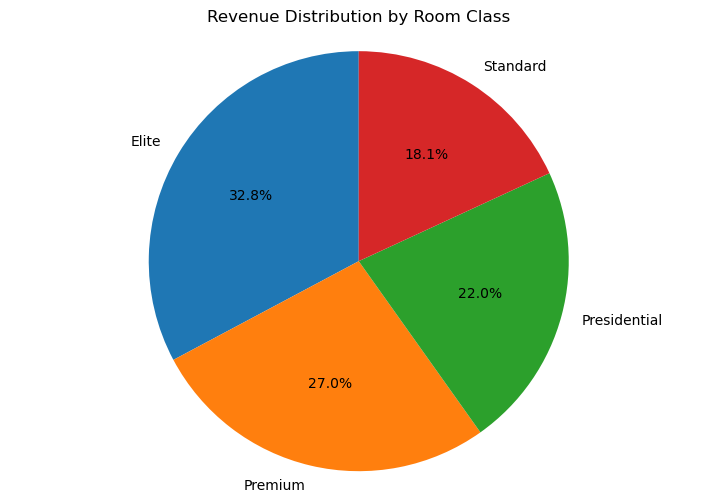

In [20]:
# Pie chart for 'Sales Channel' distribution
plt.figure(figsize=(9,6))

# Group by 'Region' and calculate total revenue for each region
revenue = df7.groupby('room_class')['revenue_realized'].sum().reset_index()

# Pie chart for total revenue distribution by region
plt.pie(revenue['revenue_realized'], labels=revenue['room_class'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Revenue Distribution by Room Class')
plt.show()

This is to calculate the total bookings by Room Category

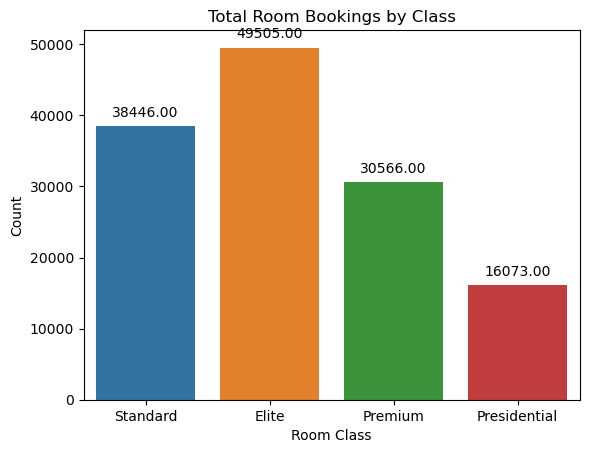

In [21]:
sns.countplot(x='room_class',data=df7)
ax = plt.gca()

# Add markers to the bar chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Room Class')
plt.title('Total Room Bookings by Class')
plt.ylabel('Count')
plt.show()

This is to create the comparison between the numbers 9of guests who checkedin to their rooms,cancelled their bookings or did bnot show up by the categories of rooms that they booked.

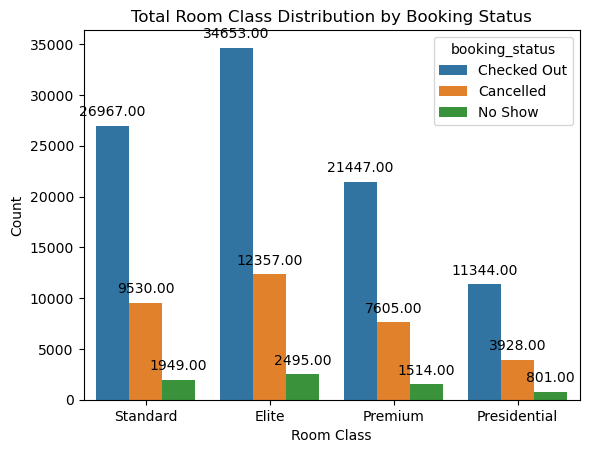

In [22]:
sns.countplot(x='room_class',hue='booking_status',data=df7)
ax = plt.gca()

# Add markers to the bar chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Room Class')
plt.ylabel('Count')
plt.title('Total Room Class Distribution by Booking Status')
plt.show()

From the above chart,we can see that the customers who booked the Standard class of rooms had the highest percentage rate of cancellations.

Now we will create a subplot to show the Revenue generation, Occupancy Rate and the Average Rating given

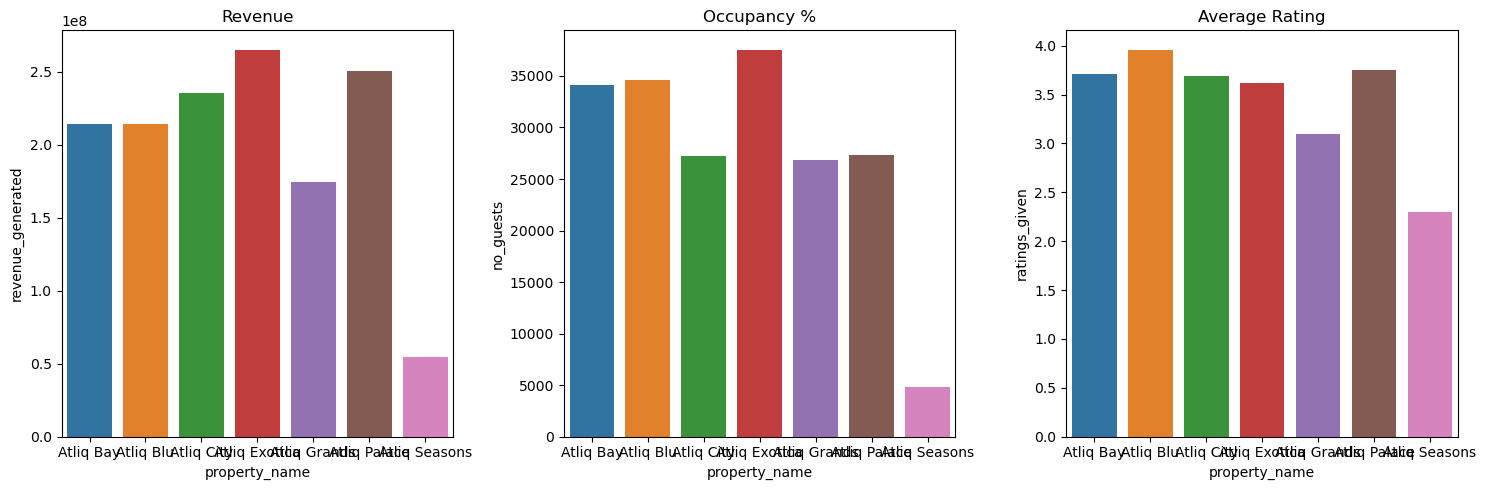

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='property_name', y='revenue_generated', data=revenue_metrics, ax=axes[0])
axes[0].set_title('Revenue')

# Occupancy % Card
sns.barplot(x='property_name', y='no_guests', data=occupancy_metrics, ax=axes[1])
axes[1].set_title('Occupancy %')

# Average Rating Card
sns.barplot(x='property_name', y='ratings_given', data=average_rating_metrics, ax=axes[2])
axes[2].set_title('Average Rating')

plt.tight_layout()
plt.show()

Now we can see the total revenue split in terms of both the city and the property

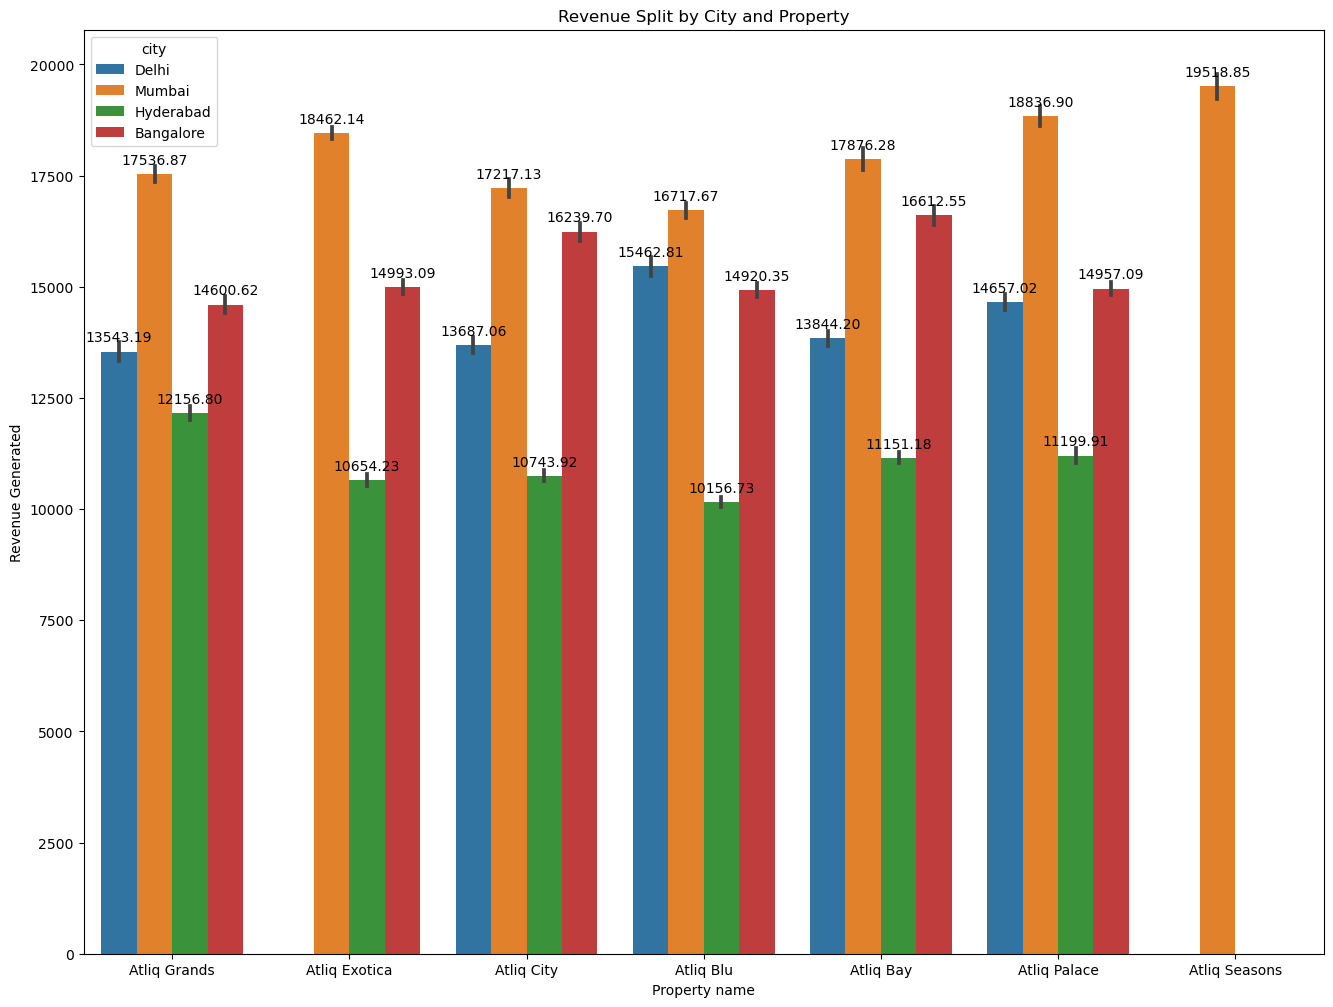

In [24]:
# Split by City and Property
plt.figure(figsize=(16,12))
sns.barplot(x='property_name', y='revenue_generated', hue='city', data=filtered_data)
ax = plt.gca()

# Add markers to the bar chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Property name')
plt.ylabel('Revenue Generated')
plt.title('Revenue Split by City and Property')
plt.show()

From the above chart we can clearly see that Mumbai is the city that is best suited for Attliq's business prospects followed by Bangalore 

now we will see the Revenue Trends by Week No.

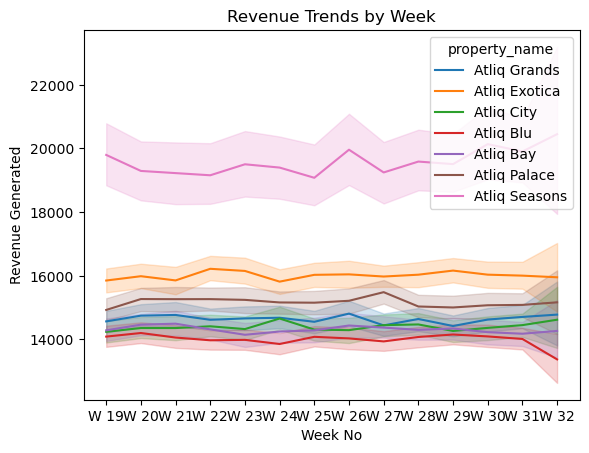

In [25]:
sns.lineplot(x='week no', y='revenue_generated', hue='property_name', data=filtered_data)
plt.xlabel('Week No')
plt.ylabel('Revenue Generated')
plt.title('Revenue Trends by Week')
plt.show()

We can clearly see that Atliq Bay is the best in terms of revenue generation 

Now we will see Occupancy by Day Type

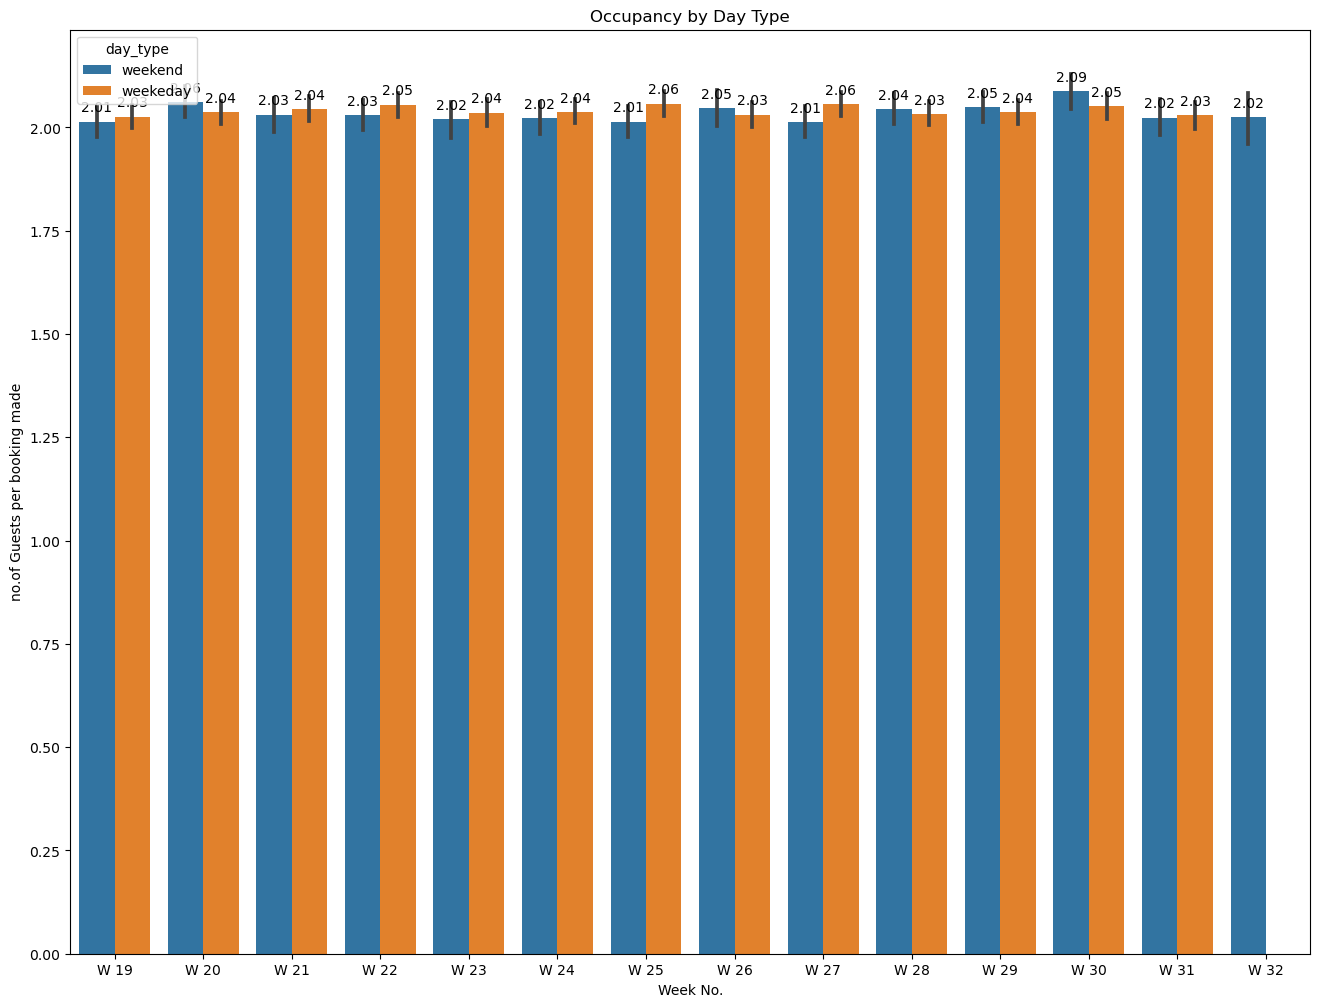

In [26]:
# Occupancy by Day Type
plt.figure(figsize=(16,12))
sns.barplot(x='week no', y='no_guests', hue='day_type', data=filtered_data)
ax = plt.gca()

# Add markers to the bar chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('no.of Guests per booking made')
plt.xlabel('Week No.')
plt.title('Occupancy by Day Type')
plt.show()

Now we can see the total Revenue Generated by the Booking Platform used

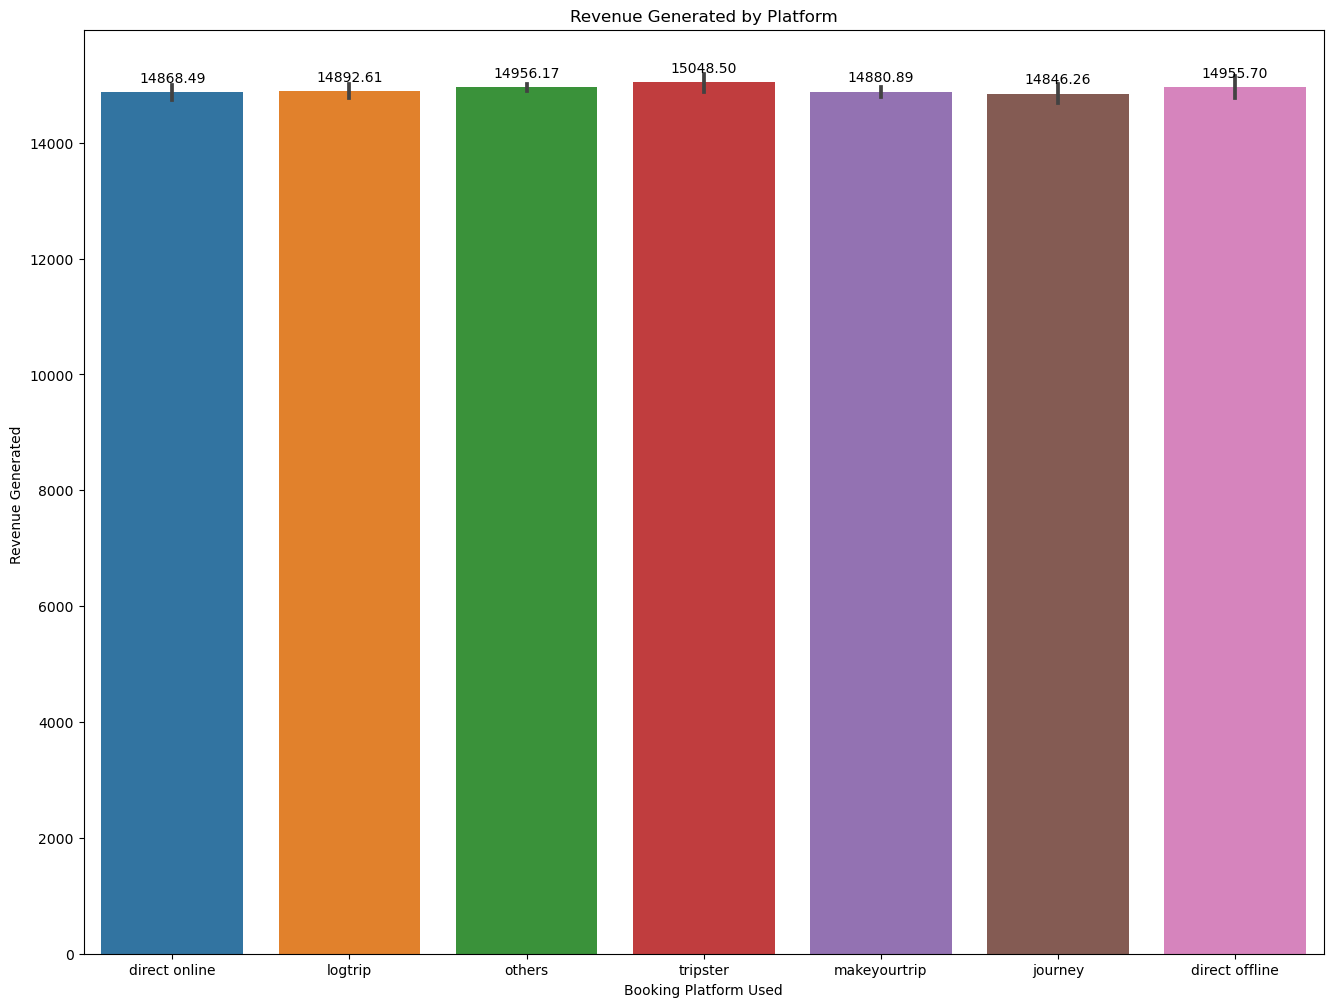

In [27]:
# Booking % by Platform
plt.figure(figsize=(16,12))
sns.barplot(x='booking_platform', y='revenue_generated', data=filtered_data)
ax = plt.gca()

# Add markers to the bar chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Booking Platform Used')
plt.ylabel('Revenue Generated ')
plt.title('Revenue Generated by Platform')
plt.show()